## Before continuing, please select menu option:  **Cell => All output => clear**

#### Lists and other python built in data structures do not provide any sort of linear alebra capabiliy:

In [1]:
a = [1, 2, 3]
a * 2   # Not the answer we want

[1, 2, 3, 1, 2, 3]

In [2]:
a = [1, 2, 3]
b = [4, 5, 6]
a + b   # Also not the answer we want

[1, 2, 3, 4, 5, 6]

# numpy - Linear algebra on n-dimensional arrays

In [3]:
import numpy as np  # usual convention is to import as np

In [4]:
a = np.random.randint(1,6,size=(5, 3))
a

array([[1, 1, 3],
       [5, 4, 2],
       [4, 3, 5],
       [1, 2, 4],
       [3, 1, 1]])

In [5]:
double = a * 2
double

array([[ 2,  2,  6],
       [10,  8,  4],
       [ 8,  6, 10],
       [ 2,  4,  8],
       [ 6,  2,  2]])

In [6]:
a = np.random.randint(1,6,size=(3, 3))
print('a =\n', a)
b = np.random.randint(1,6,size=(3, 3))
print('b =\n', b)

a =
 [[3 1 2]
 [2 3 4]
 [4 1 1]]
b =
 [[3 3 3]
 [4 5 5]
 [3 2 5]]


In [7]:
ab = a + b
ab

array([[6, 4, 5],
       [6, 8, 9],
       [7, 3, 6]])

In [8]:
a = np.random.randint(1,6,size=(5, 3))
a

array([[3, 5, 5],
       [2, 3, 3],
       [4, 5, 3],
       [5, 2, 3],
       [2, 1, 1]])

In [9]:
over3 = a > 3
over3

array([[False,  True,  True],
       [False, False, False],
       [ True,  True, False],
       [ True, False, False],
       [False, False, False]])

In [10]:
a[over3]

array([5, 5, 4, 5, 5])

In [11]:
a[a > 3]

array([5, 5, 4, 5, 5])

# Pandas Series

In [12]:
import pandas as pd

In [13]:
d = { 'a': 11, 'b': 22, 'c':33, 'd':44, 'e':55 }
ser = pd.Series(d)
ser

a    11
b    22
c    33
d    44
e    55
dtype: int64

In [14]:
for i in ser:
    print(i)

11
22
33
44
55


In [15]:
ser[1]

22

In [16]:
ser['b']

22

In [17]:
ser[1:2] # works like a list, end exclusive slicing

b    22
dtype: int64

In [18]:
ser['b':'d'] # works inclusive

b    22
c    33
d    44
dtype: int64

In [19]:
ser * 2

a     22
b     44
c     66
d     88
e    110
dtype: int64

In [20]:
ser

a    11
b    22
c    33
d    44
e    55
dtype: int64

# Pandas Dataframe

In [21]:
df = pd.DataFrame(np.random.randint(1,10, size=(8,3)), columns=list('XYZ'), index=list('abcdefgh'))
df

,X,Y,Z
a,9,7,8
b,2,7,2
c,4,8,9
d,5,4,6
e,8,6,5
f,7,4,7
g,8,6,7
h,9,4,8


In [22]:
df['my str'] = 'text' + df.X.astype(str)
df

,X,Y,Z,my str
a,9,7,8,text9
b,2,7,2,text2
c,4,8,9,text4
d,5,4,6,text5
e,8,6,5,text8
f,7,4,7,text7
g,8,6,7,text8
h,9,4,8,text9


In [23]:
df['mylist'] = np.random.randint(1,10,(8,3)).tolist()
df

,X,Y,Z,my str,mylist
a,9,7,8,text9,"[4, 6, 5]"
b,2,7,2,text2,"[4, 7, 4]"
c,4,8,9,text4,"[8, 2, 2]"
d,5,4,6,text5,"[1, 8, 1]"
e,8,6,5,text8,"[8, 4, 6]"
f,7,4,7,text7,"[5, 2, 2]"
g,8,6,7,text8,"[5, 3, 5]"
h,9,4,8,text9,"[2, 9, 7]"


In [24]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [25]:
df.columns

Index(['X', 'Y', 'Z', 'my str', 'mylist'], dtype='object')

In [26]:
df.shape

(8, 5)

In [27]:
df['Y']   # access a column

a    7
b    7
c    8
d    4
e    6
f    4
g    6
h    4
Name: Y, dtype: int32

In [28]:
df.Y   # same usng dot notation

a    7
b    7
c    8
d    4
e    6
f    4
g    6
h    4
Name: Y, dtype: int32

In [29]:
df[['Y', 'my str']]   # access multiple columns

,Y,my str
a,7,text9
b,7,text2
c,8,text4
d,4,text5
e,6,text8
f,4,text7
g,6,text8
h,4,text9


In [30]:
df.loc['c':'d']   # access rows via the index

,X,Y,Z,my str,mylist
c,4,8,9,text4,"[8, 2, 2]"
d,5,4,6,text5,"[1, 8, 1]"


In [31]:
df.loc['c':'d', 'Y']   # access a particlar series via loc of index and column

c    8
d    4
Name: Y, dtype: int32

In [32]:
df.loc['c', 'Z']   # access a particlar value

9

In [33]:
df.loc['c':'d', 'Y':'mylist']   # access a range of rows/cols

,Y,Z,my str,mylist
c,8,9,text4,"[8, 2, 2]"
d,4,6,text5,"[1, 8, 1]"


In [34]:
over = df['X'] > 3
over

a     True
b    False
c     True
d     True
e     True
f     True
g     True
h     True
Name: X, dtype: bool

In [35]:
df[over]

,X,Y,Z,my str,mylist
a,9,7,8,text9,"[4, 6, 5]"
c,4,8,9,text4,"[8, 2, 2]"
d,5,4,6,text5,"[1, 8, 1]"
e,8,6,5,text8,"[8, 4, 6]"
f,7,4,7,text7,"[5, 2, 2]"
g,8,6,7,text8,"[5, 3, 5]"
h,9,4,8,text9,"[2, 9, 7]"


In [36]:
df[ df['X'] > 3 ]

,X,Y,Z,my str,mylist
a,9,7,8,text9,"[4, 6, 5]"
c,4,8,9,text4,"[8, 2, 2]"
d,5,4,6,text5,"[1, 8, 1]"
e,8,6,5,text8,"[8, 4, 6]"
f,7,4,7,text7,"[5, 2, 2]"
g,8,6,7,text8,"[5, 3, 5]"
h,9,4,8,text9,"[2, 9, 7]"


In [37]:
5 in df.mylist

False

In [38]:
df.mylist.apply(lambda x: 5 in x)

a     True
b    False
c    False
d    False
e    False
f     True
g     True
h    False
Name: mylist, dtype: bool

In [39]:
df[df['mylist'].apply(lambda x: 5 in x)]

,X,Y,Z,my str,mylist
a,9,7,8,text9,"[4, 6, 5]"
f,7,4,7,text7,"[5, 2, 2]"
g,8,6,7,text8,"[5, 3, 5]"


In [40]:
df[df['mylist'].apply(lambda x: any(filter(lambda y: y > 5, x)))]

,X,Y,Z,my str,mylist
a,9,7,8,text9,"[4, 6, 5]"
b,2,7,2,text2,"[4, 7, 4]"
c,4,8,9,text4,"[8, 2, 2]"
d,5,4,6,text5,"[1, 8, 1]"
e,8,6,5,text8,"[8, 4, 6]"
h,9,4,8,text9,"[2, 9, 7]"


In [41]:
%matplotlib inline 

<AxesSubplot:>

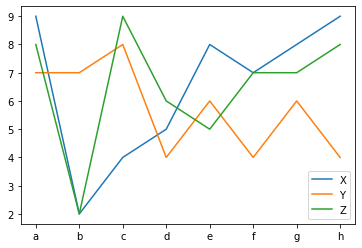

In [42]:
df[['X', 'Y', 'Z']].plot()

In [43]:
df.describe()

,X,Y,Z
count,8.00000,8.000000,8.000000
mean,6.50000,5.750000,6.500000
std,2.56348,1.581139,2.203893
min,2.00000,4.000000,2.000000
25%,4.75000,4.000000,5.750000
50%,7.50000,6.000000,7.000000
75%,8.25000,7.000000,8.000000
max,9.00000,8.000000,9.000000


In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,8.0,6.50,2.563480,2.0,4.75,7.5,8.25,9.0
Y,8.0,5.75,1.581139,4.0,4.00,6.0,7.00,8.0
Z,8.0,6.50,2.203893,2.0,5.75,7.0,8.00,9.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, a to h
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       8 non-null      int32 
 1   Y       8 non-null      int32 
 2   Z       8 non-null      int32 
 3   my str  8 non-null      object
 4   mylist  8 non-null      object
dtypes: int32(3), object(2)
memory usage: 588.0+ bytes


In [46]:
df.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, a to h
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       8 non-null      int32 
 1   Y       8 non-null      int32 
 2   Z       8 non-null      int32 
 3   my str  8 non-null      object
 4   mylist  8 non-null      object
dtypes: int32(3), object(2)
memory usage: 1.9 KB


# Pandas demo:

In [47]:
!dir testdata\AllConf.csv

 Volume in drive C is OSDisk
 Volume Serial Number is C608-462D

 Directory of C:\Users\mbutterworth\#Workspace\PythonTutButty03\testdata

02/03/2021  10:45        17,030,879 AllConf.csv
               1 File(s)     17,030,879 bytes
               0 Dir(s)  48,013,496,320 bytes free


In [48]:
from zipfile import ZipFile
import os
import re
from io import StringIO

In [49]:
import pandas as pd

In [50]:
def findgrouppattern(grouppattern, haystack):
    """Yield a list of match start, ends and values in haystack"""
    count = 0
    for m in re.finditer(grouppattern, haystack):
        count += 1
        yield (m.start(), m.end(), m.group(1))
    if count > 0:
        yield (len(haystack), 0, '') # Also return end of data
    else:
        yield None
        
def raidconf2dfdict(filename):
    """Return a dictionary of dataframes for each section of AllConf.csv"""
    if filename.lower().endswith('.zip'):
        text = ZipFile(filename).read('AllConf.csv').decode()
    else:
        if os.path.basename(filename).lower() != 'allconf.csv':
            raise RuntimeError('ERROR: Must be an AllConf.csv file')
        with open(filename) as fh:
            text = fh.read()

    pos = list(findgrouppattern('<<(.*)>>\r?\n', text))

    if not pos:
        print(f'ERROR: cannot find config sections in: {filename}')
        return None

    data = dict()
    for i in range(1,len(pos)):
        data[pos[i-1][2]] = pd.read_csv(StringIO(text[pos[i-1][1]:pos[i][0]]), engine='c')
    
    return(data)

In [51]:
data = raidconf2dfdict('testdata\\AllConf.csv')

In [52]:
data.keys()

dict_keys(['Micro Version', 'Subsystem ID', 'DKC Information', 'Cache', 'System Option Information', 'PP Information', 'PK', 'DCR Information', 'LUN Information', 'World Wide Name Information', 'LDEV', 'PDEV', 'Cha Status', 'Dka Status', 'MP Path Status', 'PDEV Status', 'LDEV Status', 'LUN Port Information', 'Main Frame Physical Path Status', 'Main Frame Logical Path Status', 'External LUN Information', 'Logical Partitioning', 'SM Install function', 'System Option Mode Per LPR', 'FC-SP Name Information', 'FC-SP Port Information', 'Device Equipment Information', 'LDEV Capacity Information', 'LDEV Count Information', 'PDEV Capacity Information', 'PCB Revision Information', 'DKA Information', 'MP Pcb Status', 'HDU Information', 'JNL Information', 'M/F DM Information', 'SSD Drive', 'MLC Endurance Information', 'Electric power and temperature Information', 'iSCSI Target Information', 'iSCSI Host Information', 'CHAP User Information', 'iSCSI Port Information', 'DKU temperature Information', 

In [53]:
data['DKC Information']

,Storage System Type,Serial Number#,IP Address,Subnet Mask,Number of CUs,Number of DKAs,Configuration Type,Module#
0,VSP G1000/G1500 and VSP F1500,10843,126.6.150.15,255.0.0.0,255,4,PCM,0


In [54]:
data['Cache']

,Module#,Cache Location,CM DIMM Size(GB),Cache Size(GB),SM Size(GB),Cache Residency Size(MB),CFM Size(GB)
0,0,CACHE-1CA,32.0,256.0,18.0,0.0,400.0
1,0,CACHE-1CB,32.0,160.0,NaN,NaN,400.0
2,1,CACHE-1CC,NaN,NaN,NaN,NaN,NaN
3,1,CACHE-1CD,NaN,NaN,NaN,NaN,NaN
4,0,CACHE-2CA,32.0,256.0,18.0,0.0,400.0
5,0,CACHE-2CB,32.0,160.0,NaN,NaN,400.0
6,1,CACHE-2CC,NaN,NaN,NaN,NaN,NaN
7,1,CACHE-2CD,NaN,NaN,NaN,NaN,NaN


In [55]:
data['LDEV'].columns

Index(['ECC Group', 'LDEV#', 'LDEV Name', 'LDEV Emulation', 'LDEV Type',
       'LDEV Attribute', 'Volume Size(Cyl)', 'Volume Size(MB)',
       'Volume Size(Blocks)', 'CVS', 'Pool ID', 'RAID Concatenation#0',
       'RAID Concatenation#1', 'RAID Concatenation#2', 'ORACLE CHECK SUM',
       'Current MP Blade', 'Setting MP Blade', 'Allocated', 'Pool Name',
       'CmdDevSecurity', 'CmdDevUserAuth', 'CmdDevDevGrpDef',
       'Resource Group ID (LDEV)', 'Resource Group Name (LDEV)', 'Encryption',
       'ALUA Mode', 'T10 PI', 'Accelerated Compression'],
      dtype='object')

In [56]:
data['LDEV']['Volume Size(MB)'].sum() / 1024 / 1024 / 1024

2.0251584395207463

In [57]:
data['LDEV']['LDEV Attribute'].value_counts()

Regular    2207
Pool        288
Journal       6
CMDDEV        3
Name: LDEV Attribute, dtype: int64

<AxesSubplot:>

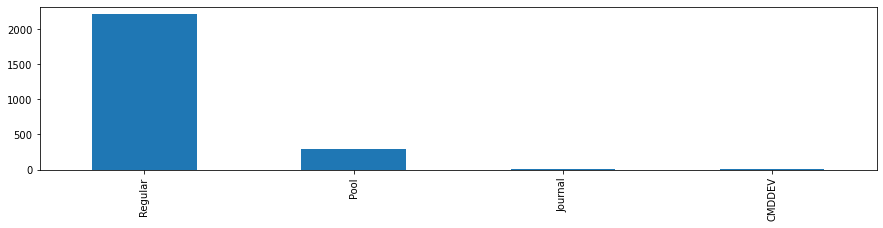

In [58]:
data['LDEV']['LDEV Attribute'].value_counts().plot(kind='bar', figsize=(15,3))

In [59]:
data['LDEV']['LDEV Type'].value_counts()

Dynamic Provisioning    2215
Basic                    288
External                   1
Name: LDEV Type, dtype: int64

In [60]:
mask = data['LDEV']['LDEV Type'] == 'Dynamic Provisioning'
mask

0       True
1       True
2       True
3       True
4       True
        ... 
2499    True
2500    True
2501    True
2502    True
2503    True
Name: LDEV Type, Length: 2504, dtype: bool

In [61]:
data['LDEV'][mask]['Volume Size(MB)'].sum() / 1024 / 1024 / 1024

1.237658237097785

<AxesSubplot:>

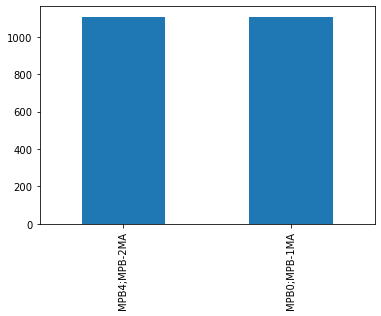

In [62]:
data['LDEV'][mask]['Current MP Blade'].value_counts().plot(kind='bar')

In [ ]:
data['LDEV'].filter(like='MP Blade').value_counts()